# Similarity functions and old cowboy novels

We've had enough problems involving `spacy` installation that we will not be using it this week. But try to have it installed for Monday.

In [10]:
from collections import Counter
import math, glob, csv, re, numpy
from matplotlib import pyplot

In [70]:
## Read metadata and text for novels

word_pattern = re.compile("\w[\w\-\']*\w|\w")

novels = []

all_counts = Counter()

with open("../data/westerns/zg_metadata.tsv") as file_reader:
    tsv_reader = csv.DictReader(file_reader, delimiter="\t")
    
    for row in tsv_reader:
        
        print("Reading {} ({})".format(row["Title"], row["Filename"]))
        novels.append(row)
        row["Year"] = int(row["Year"])
        
        counter = Counter()
        row["Tokens"] = counter
        
        line_buffer = []
        
        with open("../data/westerns/{}".format(row["Filename"])) as reader:
            for line in reader:
                line = line.rstrip()
                
                ## The encoding looks like it messed up for some documents
                line = line.replace("â", "'")
                
                ## split m-dashes
                line = line.replace("--", " -- ")
                
                if line != "":
                    line_buffer.append(line)
                else:
                    counter.update(word_pattern.findall(" ".join(line_buffer)))
                    
                    # Not using Spacy version for now, but this is what it would look like
                    #tokens = nlp(" ".join(line_buffer))
                    #counter.update([token.text for token in tokens])
                    
                    line_buffer = []
        
        all_counts += counter
                    

Reading The Desert of Wheat (10201.txt)
Reading The Lone Star Ranger (1027-0.txt)
Reading The Light of the Western Stars (1095-0.txt)
Reading Tales of Lonely Trails (12225.txt)
Reading The Spirit of the Border (1239.txt)
Reading Betty Zane (1261.txt)
Reading The Heritage of the Desert (1262-0.txt)
Reading Riders of the Purple Sage (1300.txt)
Reading The Mysterious Rider (13937.txt)
Reading The Rustlers of Pecos County (15580.txt)
Reading The Day of the Beast (15673.txt)
Reading The Call of the Canyon (1881.txt)
Reading The Young Forester (1882.txt)
Reading The Young Pitcher (19246.txt)
Reading The Last of the Plainsmen (2057.txt)
Reading Wildfire (2066.txt)
Reading To the Last Man (2070.txt)
Reading Tales of Fishes (29346.txt)
Reading The Man of the Forest (3457.txt)
Reading The Redheaded Outfielder (385.txt)
Reading The Border Legion (4552.txt)
Reading Ken Ward in the Jungle (45974.txt)
Reading The U. P. Trail (4684.txt)
Reading Desert Gold (502.txt)
Reading The Rainbow Trail (5067.tx

In [71]:
# Construct a fixed vocabulary

vocabulary = [w for w, c in all_counts.most_common()]
vocabulary_size = len(vocabulary)

reverse_vocab = { w: i for i, w in enumerate(vocabulary) }

In [72]:
def counter_to_vector(counter):
    vector = numpy.zeros(vocabulary_size)
    for word in counter.keys():
        ## look up the integer ID for the string
        word_id = reverse_vocab[word]
        vector[word_id] = counter[word]
    
    return vector / vector.sum()

In [73]:
# Convert counters to vectors
all_vector = counter_to_vector(all_counts)

for novel in novels:
    novel["Vector"] = counter_to_vector(novel["Tokens"])

1. 

The next cell shows the distribution of dates of publication for this set of novels. What is the significance of 1925?

[Answer below]



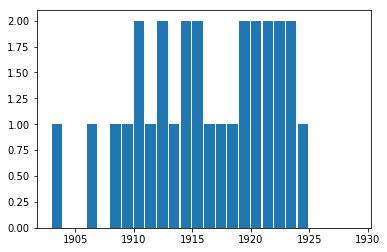

In [74]:
# Sort the novels in chronological order

novels.sort(key=lambda x: x["Year"])

pyplot.hist([novel["Year"] for novel in novels], bins=range(1903,1930), width=0.9)
pyplot.show()

2.

The following cell shows the terms of the KL divergence function, highlighting the words with the largest contributions, both positive and negative.

What do you notice about these words? Provide five examples and suggest why a word is under or overrepresented in a novel.

Does this view give you a sense of what the novel is about?

[Answer below]

In [79]:
for novel_id, novel in enumerate(novels):
    # `nonzero` returns a tuple with one element per dimension of the input array
    nzs = numpy.nonzero(novel["Vector"])[0]
    kl_terms = novel["Vector"][nzs] * numpy.log2(novel["Vector"][nzs] / all_vector[nzs])
    
    vocabulary_subset = [vocabulary[i] for i in nzs]

    sorted_words = sorted(zip(kl_terms, vocabulary_subset), reverse=True)
    print(novel_id, novel["Title"])
    print(", ".join(["{} ({:.3f})".format(w, s) for s, w in sorted_words[:20]]))
    print(", ".join(["{} ({:.3f})".format(w, s) for s, w in sorted_words[-20:]]))
    print()


0 Betty Zane
Betty (0.026), the (0.016), Zane (0.013), Isaac (0.011), Col (0.009), Alfred (0.009), Indians (0.008), Clarke (0.007), Wetzel (0.007), is (0.006), and (0.006), Myeerah (0.005), you (0.005), Miller (0.005), have (0.005), Colonel (0.005), Fort (0.004), Indian (0.004), said (0.004), am (0.003)
with (-0.001), down (-0.001), off (-0.001), if (-0.001), what (-0.001), upon (-0.001), there (-0.001), seemed (-0.001), a (-0.001), my (-0.001), then (-0.001), And (-0.001), Then (-0.001), him (-0.001), out (-0.002), But (-0.002), he (-0.002), an (-0.002), was (-0.002), to (-0.004)

1 The Spirit of the Border
Joe (0.020), the (0.015), Wetzel (0.012), Girty (0.010), Jim (0.010), his (0.009), Indians (0.007), Nell (0.006), Indian (0.006), Heckewelder (0.005), Wingenund (0.004), Wells (0.004), Edwards (0.004), savages (0.004), Joe's (0.004), Winds (0.003), renegade (0.003), Village (0.003), Silvertip (0.003), The (0.003)
a (-0.001), It (-0.001), She (-0.001), down (-0.001), not (-0.001), i

22 To the Last Man
Jean (0.044), Ellen (0.029), Isbel (0.022), y'u (0.017), Jorth (0.015), Colter (0.009), her (0.009), an (0.009), heah (0.006), she (0.005), Blaisdell (0.005), An (0.005), Jean's (0.004), shore (0.004), Daggs (0.004), Greaves (0.004), Wal (0.004), Shore (0.004), father (0.004), Bruce (0.003)
on (-0.001), at (-0.001), were (-0.001), would (-0.001), here (-0.001), You (-0.001), but (-0.001), have (-0.001), up (-0.001), me (-0.001), for (-0.001), is (-0.001), was (-0.001), He (-0.001), The (-0.002), a (-0.002), I (-0.003), you (-0.004), the (-0.005), and (-0.007)

23 Tales of Lonely Trails
I (0.021), we (0.015), and (0.014), We (0.009), hounds (0.008), my (0.008), Jones (0.007), bear (0.006), lion (0.006), C (0.006), R (0.006), the (0.006), Emett (0.006), our (0.006), Copple (0.005), us (0.005), down (0.005), a (0.005), Haught (0.004), Nielsen (0.004)
now (-0.001), not (-0.001), man (-0.001), if (-0.001), as (-0.001), is (-0.001), been (-0.001), that (-0.001), it (-0.001

3.

The next cell shows five similarity functions that take two numpy arrays as input. Try at least 5 examples of input values using small arrays, and apply each function to those pairs.

Describe how the functions are different and what a typical range of values is. Why are the last two functions different? (Why am I subtracting from 1?)

[Answer below]

In [103]:
def jaccard(a, b):
    set_a = set(numpy.nonzero(a)[0].flatten())
    set_b = set(numpy.nonzero(b)[0].flatten())
    
    return len(set_a & set_b) / len(set_a | set_b)

def cosine(a, b):
    norm_a = numpy.linalg.norm(a)
    norm_b = numpy.linalg.norm(b)
    
    return a.dot(b) / (norm_a * norm_b)

def absolute(a, b):
    return 1 - 0.5 * numpy.sum(numpy.abs(a - b))

def js(a, b):
    c = 0.5 * (a + b)
    nz = numpy.nonzero(a)
    kl_a = numpy.sum( a[nz] * numpy.log2(a[nz]/c[nz]) )
    
    nz = numpy.nonzero(b)
    kl_b = numpy.sum( b[nz] * numpy.log2(b[nz]/c[nz]) )
    
    return 1 - 0.5 * (kl_a + kl_b)

In [ ]:
# Use print statements to show examples here

4.

The following blocks allow you to compare one novel to all the others, and to compare all novels to each other.

What does this format tell you about these novels?

Are there outliers, and why are they different?

Are some novels more similar to e

In [116]:
def compare_novels(query_novel, similarity_function):
    comparisons = [("{:.3f}".format(similarity_function(query_novel["Vector"], novel["Vector"])), 
                    novel["Title"], novel["Year"])
                   for novel in novels]
    return sorted(comparisons, reverse=True)

In [118]:
compare_novels(novels[19], absolute)

[('1.000', 'The Man of the Forest', 1920),
 ('0.769', 'The Light of the Western Stars', 1914),
 ('0.764', 'To the Last Man', 1921),
 ('0.762', 'The Mysterious Rider', 1921),
 ('0.753', 'Wildfire', 1917),
 ('0.752', 'The Desert of Wheat', 1919),
 ('0.750', 'The Border Legion', 1916),
 ('0.750', 'Riders of the Purple Sage', 1912),
 ('0.748', 'The Lone Star Ranger', 1915),
 ('0.739', 'Desert Gold', 1913),
 ('0.738', 'The U. P. Trail', 1918),
 ('0.731', 'The Day of the Beast', 1922),
 ('0.728', 'The Rainbow Trail', 1915),
 ('0.723', 'The Last Trail', 1909),
 ('0.721', 'The Rustlers of Pecos County', 1914),
 ('0.721', 'The Call of the Canyon', 1924),
 ('0.716', 'The Wanderer of the Wasteland', 1923),
 ('0.698', 'The Young Forester', 1910),
 ('0.698', 'Betty Zane', 1903),
 ('0.694', 'The Heritage of the Desert', 1910),
 ('0.692', 'The Spirit of the Border', 1906),
 ('0.683', 'Tales of Lonely Trails', 1922),
 ('0.672', 'The Last of the Plainsmen', 1908),
 ('0.670', "Tappan's Burro", 1923),
 (

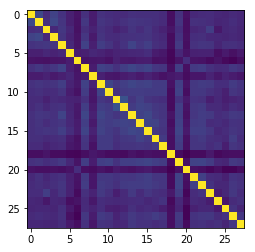

In [119]:
n_novels = len(novels)

novel_sims = numpy.zeros( (n_novels, n_novels) )

similarity_function = jaccard

for i, novel_a in enumerate(novels):
    for j, novel_b in enumerate(novels):
        novel_sims[i,j] = similarity_function(novel_a["Vector"], novel_b["Vector"])

pyplot.imshow(novel_sims)
pyplot.show()